In [1]:
print("hello world")

hello world


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from collections import Counter


In [3]:
# Define the path to the dataset
file_path = 'grouup_5/Question Answer Classification Dataset 5[Training].csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


                                             QA Text                  Class
0  Question Title:\ni am good at web design amate...     Business & Finance
1  Question Title:\nMy daughter wants to be a Med...  Education & Reference
2  Question Title:\nIs brother Jesus our brother ...      Society & Culture
3  Question Title:\nwhat is I-20?\nQuestion Conte...  Education & Reference
4  Question Title:\nwhat is a data disk?\nQuestio...   Computers & Internet


In [4]:
data.dtypes

QA Text    object
Class      object
dtype: object

EDA

In [5]:
data.shape

(280003, 2)

In [6]:
data['Class'].value_counts()

Class
Entertainment & Music     28267
Health                    28186
Sports                    28074
Science & Mathematics     28039
Computers & Internet      27980
Education & Reference     27972
Business & Finance        27953
Family & Relationships    27905
Society & Culture         27881
Politics & Government     27746
Name: count, dtype: int64

In [7]:
data.isnull().sum()

QA Text    0
Class      0
dtype: int64

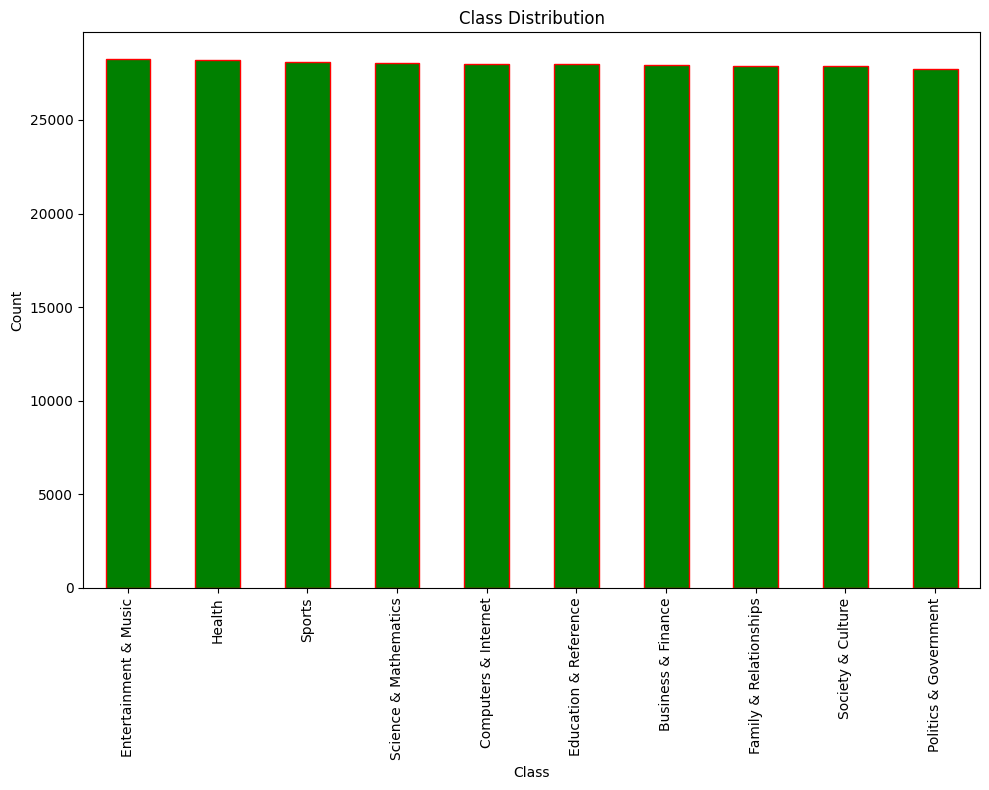

In [8]:
class_plot = data['Class'].value_counts()
plt.figure(figsize=(10,8))
class_plot.plot(kind='bar', color='green', edgecolor='red')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
data['QA Text'].isnull().sum()

np.int64(0)

In [10]:
# text = ' '.join(data['QA Text'].astype(str))
# wordcloud = WordCloud(width=1600, height=900, background_color='white').generate(text)

# plt.figure(figsize=(12,8))

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [11]:
data.tail(5)

,QA Text,Class
279998,Question Title:\nWhat is the best way to learn...,Education & Reference
279999,Question Title:\nWhat is the current payroll o...,Sports
280000,Question Title:\nWhat's your opinion on the ba...,Sports
280001,Question Title:\nWhat do you think will happen...,Society & Culture
280002,Question Title:\nwhat am i thinking right now?...,Business & Finance


Basic Preprocessing

In [12]:
data['QA Text'] = data['QA Text'].str.lower()

In [13]:
data['QA Text'] = data['QA Text'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

In [14]:
data['QA Text'] = data['QA Text'].apply(lambda x: word_tokenize(x))

In [15]:
stop_words = set(stopwords.words('english'))
data['QA Text'] = data['QA Text'].apply(lambda x: [word for word in x if word not in stop_words])


In [16]:
data['QA Text'].head()

0    [question, title, good, web, design, amateurly...
1    [question, title, daughter, wants, medical, il...
2    [question, title, brother, jesus, brother, kin...
3    [question, title, i20, question, content, stud...
4    [question, title, data, disk, question, conten...
Name: QA Text, dtype: object

In [17]:
all_tokens = [word for text in data['QA Text'] for word in text]

In [18]:
word_freq = Counter(all_tokens)
commom_10_words = [word for word, count in word_freq.most_common(10)]
print(commom_10_words)

['question', 'best', 'answer', 'title', 'content', 'like', 'get', 'would', 'one', 'know']
